# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [ ]:
#pip install tensorflow

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = boston_housing.load_data()

In [4]:
from sklearn.datasets import load_boston
data = load_boston()
X, y = data.data, data.target
print("X :",X.shape, "y :",y.shape)

X : (506, 13) y : (506,)


❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [5]:
(X_train, y_train),(X_test, y_test) = boston_housing.load_data()
print("X_train :",X_train.shape, "X_test :",X_test.shape, "y_train :",y_train.shape, "y_test :",y_test.shape)

X_train : (404, 13) X_test : (102, 13) y_train : (404,) y_test : (102,)


❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [6]:
y_train_mean = y_train.mean()
print("train :",y_train_mean)
y_test_mean = y_test.mean()
print("test :",y_test_mean)

train : 22.395049504950492
test : 23.07843137254902


In [7]:
mean_square_error =  np.abs(y_train_mean - y_test_mean)
mean_square_error 

0.683381867598527

# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units =10, input_shape=(13,), activation='relu', kernel_initializer="uniform", input_dim=13))
    model.add(tf.keras.layers.Dense(units =7, input_shape=(13,), activation='relu', kernel_initializer="uniform", input_dim=13))
    model.add(tf.keras.layers.Dense(units =1, activation='linear'))
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
    #Faire une synthese
    model.summary()
    return model

model = initialize_model()
model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [9]:
#from tensorflow.keras.optimizers import Adam
optimizer_name = 'Adam'

def compile_model(model, optimizer_name):
    model.compile(optimizer= optimizer_name, loss='MSE', metrics=['MAE'])
    return model
compile_model(model, optimizer_name)

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

def trouve_ovorfiting():
    ovorfiting = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights= True)
    model.compile(optimizer='adam', loss='MSE', metrics=['MAE'])
    history = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.3)
    res = model.evaluate(X_test, y_test)
    
    return ovorfiting, res[1], history
trouve_ovorfiting()

Epoch 1/50
29/29 [==============================] - 1s 14ms/step - loss: 415.9716 - MAE: 18.1679 - val_loss: 300.1568 - val_MAE: 13.9695
Epoch 2/50
29/29 [==============================] - 0s 5ms/step - loss: 145.6869 - MAE: 9.0020 - val_loss: 131.9525 - val_MAE: 8.8221
Epoch 3/50
29/29 [==============================] - 0s 5ms/step - loss: 97.0753 - MAE: 7.2132 - val_loss: 120.7076 - val_MAE: 8.0413
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 84.2298 - MAE: 6.5505 - val_loss: 109.5803 - val_MAE: 7.6640
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 79.6988 - MAE: 6.4054 - val_loss: 105.6178 - val_MAE: 7.0826
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 70.6788 - MAE: 5.9636 - val_loss: 96.8503 - val_MAE: 7.0237
Epoch 7/50
29/29 [==============================] - 0s 4ms/step - loss: 66.6239 - MAE: 5.8501 - val_loss: 93.0507 - val_MAE: 6.8666
Epoch 8/50
29/29 [==============================] - 0s 4ms/step - 

(<keras.callbacks.EarlyStopping at 0x273191e1850>,
 4.774954795837402,
 <keras.callbacks.History at 0x273192a0760>)

In [11]:
type(trouve_ovorfiting())

Epoch 1/50
29/29 [==============================] - 1s 9ms/step - loss: 32.4356 - MAE: 4.0747 - val_loss: 58.1245 - val_MAE: 5.1754
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 30.8677 - MAE: 3.9398 - val_loss: 56.9801 - val_MAE: 5.2955
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 30.8653 - MAE: 3.9907 - val_loss: 56.8197 - val_MAE: 5.1029
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 30.6078 - MAE: 3.9846 - val_loss: 56.6706 - val_MAE: 5.0367
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 29.5457 - MAE: 3.8896 - val_loss: 56.3706 - val_MAE: 4.9876
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 30.9062 - MAE: 3.9573 - val_loss: 55.0438 - val_MAE: 5.0739
Epoch 7/50
29/29 [==============================] - 0s 4ms/step - loss: 31.4655 - MAE: 4.1865 - val_loss: 56.1541 - val_MAE: 4.8984
Epoch 8/50
29/29 [==============================] - 0s 4ms/step - loss: 29.0

tuple

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

def trouve_ovorfiting():
    ovorfiting = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights= True)
    model.compile(optimizer='adam', loss='MSE', metrics=['MAE','MSE'])
    #history = model.fit(X_train, y_train, batch_size=10, epochs=5, validation_split=0.3)
    res = model.evaluate(X_test, y_test)
    
    return ovorfiting, res[1]
trouve_ovorfiting()

4/4 [==============================] - 0s 5ms/step - loss: 32.5428 - MAE: 4.2552 - MSE: 32.5428


(<keras.callbacks.EarlyStopping at 0x2731ceec580>, 4.255184173583984)

In [21]:
 history = model.fit(X_train, y_train, batch_size=10, epochs=5, validation_split=0.3)

Epoch 1/5
29/29 [==============================] - 1s 9ms/step - loss: 22.4135 - MAE: 3.6078 - MSE: 22.4135 - val_loss: 43.7254 - val_MAE: 4.2946 - val_MSE: 43.7254
Epoch 2/5
29/29 [==============================] - 0s 5ms/step - loss: 21.9321 - MAE: 3.5273 - MSE: 21.9321 - val_loss: 42.8199 - val_MAE: 4.2502 - val_MSE: 42.8199
Epoch 3/5
29/29 [==============================] - 0s 5ms/step - loss: 21.8732 - MAE: 3.5051 - MSE: 21.8732 - val_loss: 41.0829 - val_MAE: 4.2014 - val_MSE: 41.0829
Epoch 4/5
29/29 [==============================] - 0s 5ms/step - loss: 21.7159 - MAE: 3.5327 - MSE: 21.7159 - val_loss: 40.5420 - val_MAE: 4.2175 - val_MSE: 40.5420
Epoch 5/5
29/29 [==============================] - 0s 5ms/step - loss: 22.6888 - MAE: 3.6463 - MSE: 22.6888 - val_loss: 38.0760 - val_MAE: 4.2420 - val_MSE: 38.0760


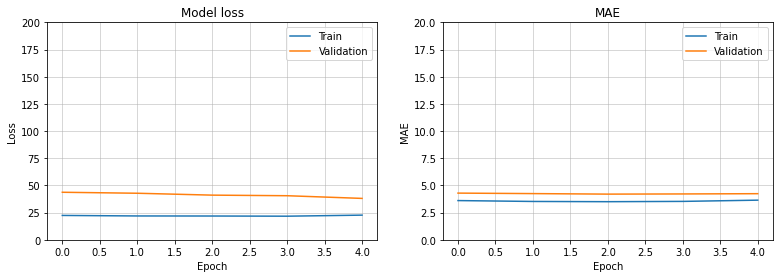

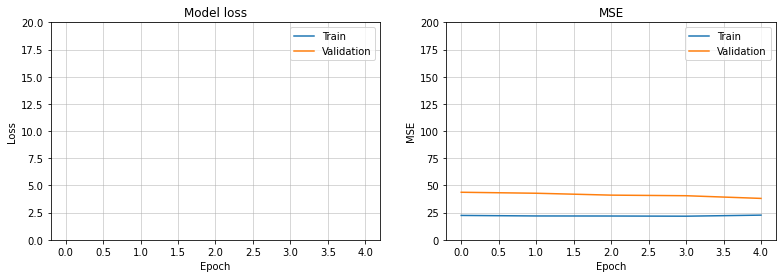

In [22]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['MAE'])
    ax2.plot(history.history['val_MAE'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

plot_loss_mae(history)

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['MSE'])
    ax2.plot(history.history['val_MSE'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5) 

    plt.show()
plot_loss_mse(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                140       
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 34.1061 - MAE: 4.1554
MAE with the rmsprop optimizer: 4.1554  reached in 14 s after 174 epochs


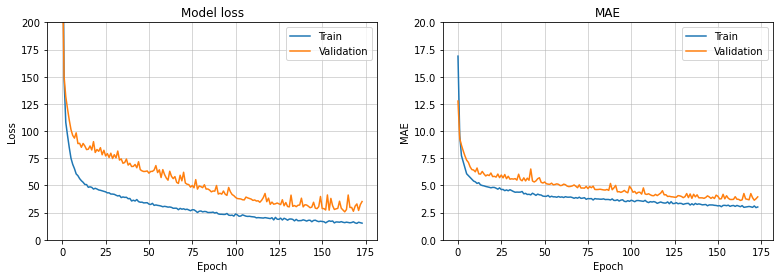

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                140       
                                                                 
 dense_7 (Dense)             (None, 7)                 77        
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 2ms/step - loss: 28.9577 - MAE: 3.8159
MAE with the adam optimizer: 3.8159  reached in 17 s after 262 epochs


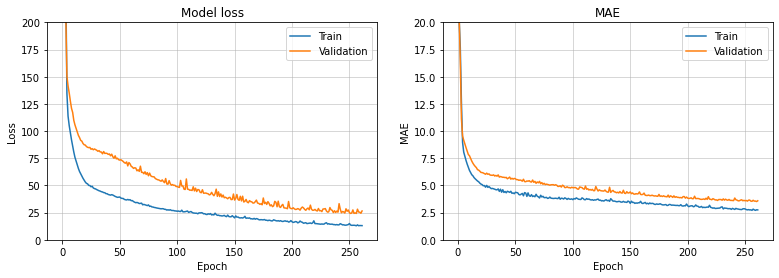

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                140       
                                                                 
 dense_10 (Dense)            (None, 7)                 77        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 3ms/step - loss: 97.5620 - MAE: 7.2366
MAE with the adagrad optimizer: 7.2366  reached in 32 s after 500 epochs


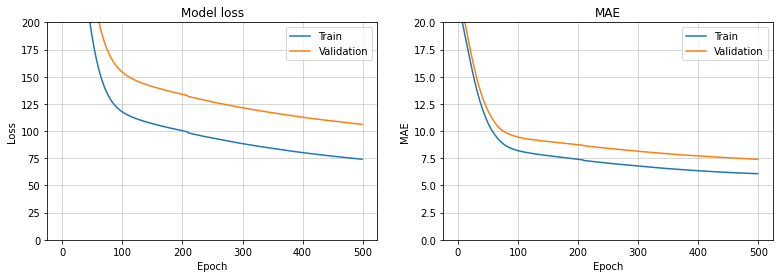

In [23]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

In [18]:
# YOUR CODE HERE
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

In [28]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]
#def adam()
for lr in range(len(learning_rates)):
    print(learning_rates[lr])
    stock = tf.keras.optimizers.Adam(learning_rate=learning_rates[lr], name='Adam')
print(stock)                                 

0.0001
0.001
0.01
0.1
1
5


# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

def trouve_ovorfiting():
    ovorfiting = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights= True)
    model.compile(optimizer='adam', loss='MSE', metrics=['MAE','MSE'])
    model.fit(X_train, y_train, batch_size=10, epochs=5, validation_split=0.3)
    res = model.evaluate(X_test, y_test)
    
    return ovorfiting, res[1]
trouve_ovorfiting()
# YOUR CODE HERE

Epoch 1/5
29/29 [==============================] - 1s 12ms/step - loss: 72.6290 - MAE: 6.0570 - MSE: 72.6290 - val_loss: 101.6304 - val_MAE: 7.0420 - val_MSE: 101.6304
Epoch 2/5
29/29 [==============================] - 0s 4ms/step - loss: 67.1636 - MAE: 5.8525 - MSE: 67.1636 - val_loss: 96.2946 - val_MAE: 6.8253 - val_MSE: 96.2946
Epoch 3/5
29/29 [==============================] - 0s 4ms/step - loss: 62.8884 - MAE: 5.6313 - MSE: 62.8884 - val_loss: 90.8707 - val_MAE: 6.8170 - val_MSE: 90.8707
Epoch 4/5
29/29 [==============================] - 0s 4ms/step - loss: 59.3536 - MAE: 5.4835 - MSE: 59.3536 - val_loss: 88.8476 - val_MAE: 6.4334 - val_MSE: 88.8476
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 74.0958 - MAE: 6.0942 - MSE: 74.0958


(<keras.callbacks.EarlyStopping at 0x2731ca6e160>, 6.094170093536377)

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

def trouve_ovorfiting():
    ovorfiting = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights= True)
    model.compile(optimizer='adam', loss='MSE', metrics=['MAE','MSE'])
    #model.fit(X_train, y_train, batch_size=10, epochs=5, validation_split=0.3)
    res = model.evaluate(X_test, y_test)
    
    return ovorfiting, res[1]
trouve_ovorfiting()
# YOUR CODE HERE
# YOUR CODE HERE

# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [ ]:
# YOUR CODE

## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [ ]:
# YOUR CODE HERE

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline